### Miscelleneous tips

- Tab Complete
- a.b?
- Black format
- rich
    - table
    - inspect
- dir()
- timing
- timing with sort?!
- timeit object
- plotting timing
- array .tolist()
- Dataclasses
- Annotation
- Plotting with pandas (sin, log, question ...)


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [14]:
n = 100
k = 20
m = 50

np.random.seed(0)
a = np.random.randn(n, k)
b = np.random.randn(k, m)
a.shape, b.shape

((100, 20), (20, 50))

In [18]:
a_list_of_list = a.tolist()
a_list_of_list[0]

list

In [28]:
"list" in dir(a)[:]

False

In [38]:
import rich
rich.inspect(a.tolist, methods=True, all=True)

╭──────────────────────── <built-in method tolist of numpy.ndarray object at 0x164cbb8d0> ────────────────────────╮
│ def ndarray.tolist(...)                                                                                         │
│                                                                                                                 │
│ a.tolist()                                                                                                      │
│                                                                                                                 │
│            __doc__ = "a.tolist()\n\n    Return the array as an ``a.ndim``-levels deep nested list of Python     │
│                      scalars.\n\n    Return a copy of the array data as a (nested) Python list.\n    Data items │
│                      are converted to the nearest compatible builtin Python type, via\n    the                  │
│                      `~numpy.ndarray.item` function.\n\n    If ``a.ndim`` is 0, then since the depth of the     │
│                      nested list is 0, it will\n    not be a list at all, but a simple Python scalar.\n\n       │
│                      Parameters\n    ----------\n    none\n\n    Returns\n    -------\n    y : object, or list  │
│                      of object, or list of list of object, or ...\n        The possibly nested list of array    │
│                      elements.\n\n    Notes\n    -----\n    The array may be recreated via ``a =                │
│                      np.array(a.tolist())``, although this\n    may sometimes lose precision.\n\n    Examples\n │
│                      --------\n    For a 1D array, ``a.tolist()`` is almost the same as ``list(a)``,\n          │
│                      except that ``tolist`` changes numpy scalars to Python scalars:\n\n    >>> a =             │
│                      np.uint32([1, 2])\n    >>> a_list = list(a)\n    >>> a_list\n    [1, 2]\n    >>>           │
│                      type(a_list[0])\n    <class 'numpy.uint32'>\n    >>> a_tolist = a.tolist()\n    >>>        │
│                      a_tolist\n    [1, 2]\n    >>> type(a_tolist[0])\n    <class 'int'>\n\n    Additionally,    │
│                      for a 2D array, ``tolist`` applies recursively:\n\n    >>> a = np.array([[1, 2], [3,       │
│                      4]])\n    >>> list(a)\n    [array([1, 2]), array([3, 4])]\n    >>> a.tolist()\n    [[1,    │
│                      2], [3, 4]]\n\n    The base case for this recursion is a 0D array:\n\n    >>> a =          │
│                      np.array(1)\n    >>> list(a)\n    Traceback (most recent call last):\n      ...\n          │
│                      TypeError: iteration over a 0-d array\n    >>> a.tolist()\n    1"                          │
│         __module__ = None                                                                                       │
│           __name__ = 'tolist'                                                                                   │
│       __qualname__ = 'ndarray.tolist'                                                                           │
│           __self__ = array([[ 1.76405235e+00,  4.00157208e-01,  9.78737984e-01, ...,                            │
│                              -2.05158264e-01,  3.13067702e-01, -8.54095739e-01],                                │
│                             [-2.55298982e+00,  6.53618595e-01,  8.64436199e-01, ...,                            │
│                               1.20237985e+00, -3.87326817e-01, -3.02302751e-01],                                │
│                             [-1.04855297e+00, -1.42001794e+00, -1.70627019e+00, ...,                            │
│                               3.02471898e-01, -6.34322094e-01, -3.62741166e-01],                                │
│                             ...,                                                                                │
│                             [ 8.73311836e-01,  1.19973

In [ ]:
lambda x: np.power(x, 3)


def f(x):
    return np.power(x, 3)

In [53]:
d = {
    r"$\sin(x)$": np.sin,
    r"$\log(x)$": np.log,
    r"$\frac{sin(x)}{x}$": lambda x: np.sin(x) / x,
    r"$x^3$": lambda x: np.power(x, 3),
}

In [54]:
d

{'$\\sin(x)$': <ufunc 'sin'>,
 '$\\log(x)$': <ufunc 'log'>,
 '$\\frac{sin(x)}{x}$': <function __main__.<lambda>(x)>,
 '$x^3$': <function __main__.<lambda>(x)>}

In [55]:
x = np.arange(0.005, 10.0, 0.005)

In [56]:
e = {k: v(x) for k, v in d.items()}

In [57]:
e

{'$\\sin(x)$': array([ 0.00499998,  0.00999983,  0.01499944, ..., -0.53137431,
        -0.53560333, -0.53981897]),
 '$\\log(x)$': array([-5.29831737, -4.60517019, -4.19970508, ...,  2.30108397,
         2.30158459,  2.30208497]),
 '$\\frac{sin(x)}{x}$': array([ 0.99999583,  0.99998333,  0.9999625 , ..., -0.05321726,
        -0.05361395, -0.0540089 ]),
 '$x^3$': array([1.25000000e-07, 1.00000000e-06, 3.37500000e-06, ...,
        9.95506747e+02, 9.97002999e+02, 9.98500750e+02])}

In [58]:
df = pd.DataFrame(e, index=x)

In [59]:
df

,$\sin(x)$,$\log(x)$,$\frac{sin(x)}{x}$,$x^3$
0.005,0.005000,-5.298317,0.999996,1.250000e-07
0.010,0.010000,-4.605170,0.999983,1.000000e-06
0.015,0.014999,-4.199705,0.999963,3.375000e-06
0.020,0.019999,-3.912023,0.999933,8.000000e-06
0.025,0.024997,-3.688879,0.999896,1.562500e-05
...,...,...,...,...
9.975,-0.522877,2.300082,-0.052419,9.925187e+02
9.980,-0.527132,2.300583,-0.052819,9.940120e+02
9.985,-0.531374,2.301084,-0.053217,9.955067e+02
9.990,-0.535603,2.301585,-0.053614,9.970030e+02


<AxesSubplot:>

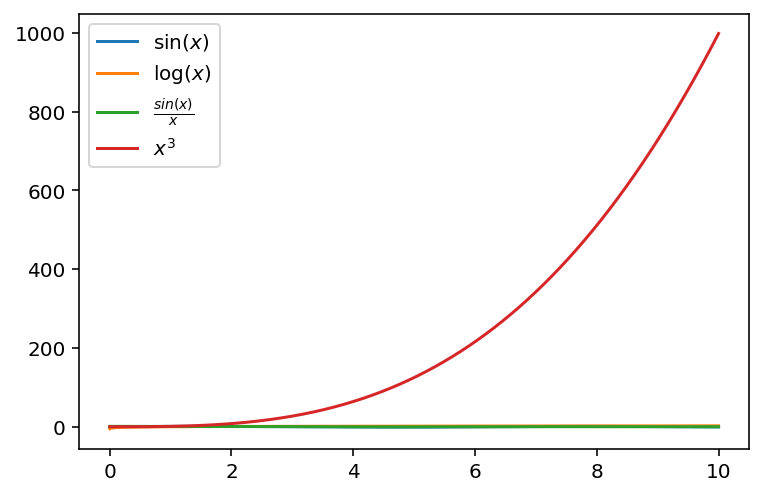

In [64]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

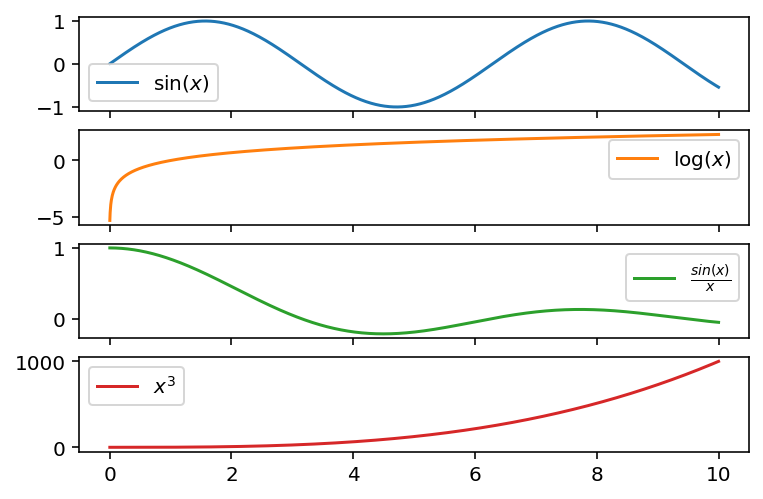

In [63]:
df.plot(subplots=True)

In [46]:
df

,$\sin$,log,$\frac{sin(x)}{x}$,x^3
0.005,0.005000,-5.298317,0.999996,1.250000e-07
0.010,0.010000,-4.605170,0.999983,1.000000e-06
0.015,0.014999,-4.199705,0.999963,3.375000e-06
0.020,0.019999,-3.912023,0.999933,8.000000e-06
0.025,0.024997,-3.688879,0.999896,1.562500e-05
...,...,...,...,...
9.975,-0.522877,2.300082,-0.052419,9.925187e+02
9.980,-0.527132,2.300583,-0.052819,9.940120e+02
9.985,-0.531374,2.301084,-0.053217,9.955067e+02
9.990,-0.535603,2.301585,-0.053614,9.970030e+02


<AxesSubplot:>

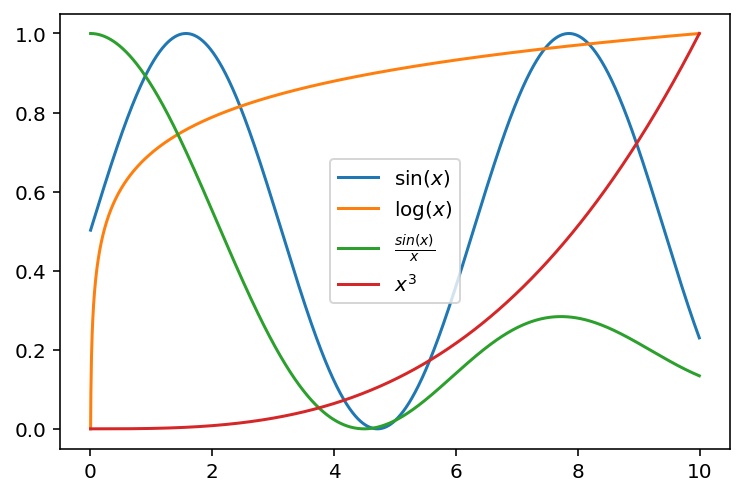

In [65]:
((df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))).plot()

In [66]:
df = pd.DataFrame(np.random.randn(1000, 5),
                  columns="a,b,c,d,e".split(","))
df

,a,b,c,d,e
0,1.593274,0.568722,-0.114487,0.251630,-1.210856
1,-0.393734,0.085253,0.099422,-1.530616,0.327623
2,0.279196,-0.377051,0.004175,-1.483492,-1.479796
3,0.134687,-0.667723,-0.011556,0.839491,-0.173930
4,-2.810668,-0.150654,-0.481044,-0.234694,0.899731
...,...,...,...,...,...
995,-0.837658,1.315288,-0.364523,1.993571,1.584878
996,-2.104663,-2.553118,-1.242666,0.201987,-0.305332
997,-1.195587,-1.577903,0.849912,0.327590,-0.001670
998,-0.035563,-0.489252,1.930498,-0.262645,0.825932


In [67]:
df = df.assign(f=df.sum(axis=1))

In [68]:
df

,a,b,c,d,e,f
0,1.593274,0.568722,-0.114487,0.251630,-1.210856,1.088284
1,-0.393734,0.085253,0.099422,-1.530616,0.327623,-1.412052
2,0.279196,-0.377051,0.004175,-1.483492,-1.479796,-3.056967
3,0.134687,-0.667723,-0.011556,0.839491,-0.173930,0.120969
4,-2.810668,-0.150654,-0.481044,-0.234694,0.899731,-2.777329
...,...,...,...,...,...,...
995,-0.837658,1.315288,-0.364523,1.993571,1.584878,3.691555
996,-2.104663,-2.553118,-1.242666,0.201987,-0.305332,-6.003792
997,-1.195587,-1.577903,0.849912,0.327590,-0.001670,-1.597657
998,-0.035563,-0.489252,1.930498,-0.262645,0.825932,1.968971


In [66]:
df.query("f > 5")["f"].std()

0.6609257763922614

In [67]:
df.query("f <= 5")["f"].std()

2.1891090850524444

In [71]:
"tolist" in dir(df)

False

In [29]:
def search(obj, query):
    import re

    return list(filter(lambda x: re.search(query, x), dir(obj)))

In [34]:
search(a, "lis")

['tolist']

In [1]:
import numpy as np
import pandas as pd

In [98]:
def search(obj, query):
    import re
    from rich import inspect
    from rich.pretty import Pretty
    from rich.panel import Panel

    z = list(filter(lambda x: re.search(query, x), dir(obj)))
    p = Panel(Pretty("a"), title=f"Searching for `{query}`")
    # return p
    ps = []
    for q in z:
        ps.append(Panel(Pretty(inspect(getattr(obj, q), methods=True, docs=True))))

In [99]:
search(np.random, "normal")

╭─ <built-in method lognormal of numpy.random.mtrand.RandomState object at 0x10c627840> ─╮
│ def RandomState.lognormal(...)                                                         │
│                                                                                        │
│ lognormal(mean=0.0, sigma=1.0, size=None)                                              │
│                                                                                        │
│ 29 attribute(s) not shown. Run inspect(inspect) for options.                           │
╰────────────────────────────────────────────────────────────────────────────────────────╯

╭─ <built-in method multivariate_normal of numpy.random.mtrand.RandomState object at 0x10c627840> ─╮
│ def RandomState.multivariate_normal(...)                                                         │
│                                                                                                  │
│ multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)                          │
│                                                                                                  │
│ 29 attribute(s) not shown. Run inspect(inspect) for options.                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ <built-in method normal of numpy.random.mtrand.RandomState object at 0x10c627840> ─╮
│ def RandomState.normal(...)                                                         │
│                                                                                     │
│ normal(loc=0.0, scale=1.0, size=None)                                               │
│                                                                                     │
│ 29 attribute(s) not shown. Run inspect(inspect) for options.                        │
╰─────────────────────────────────────────────────────────────────────────────────────╯

╭─ <built-in method standard_normal of numpy.random.mtrand.RandomState object at 0x10c627840> ─╮
│ def RandomState.standard_normal(...)                                                         │
│                                                                                              │
│ standard_normal(size=None)                                                                   │
│                                                                                              │
│ 29 attribute(s) not shown. Run inspect(inspect) for options.                                 │
╰──────────────────────────────────────────────────────────────────────────────────────────────╯

In [73]:
getattr(pd.DataFrame().values, "tolist")

<function ndarray.tolist>

In [70]:
pd.DataFrame.to

""


In [14]:
df = pd.DataFrame()
search(df.values, "list")

╭───────────────────────────────────────────── Searching for {query} ─────────────────────────────────────────────╮
│ ['tolist']                                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [11]:
search(pd.DataFrame, "to")

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ [                                                                                                               │
│     '_constructor',                                                                                             │
│     '_constructor_sliced',                                                                                      │
│     '_to_dict_of_blocks',                                                                                       │
│     'kurtosis',                                                                                                 │
│     'to_clipboard',                                                                                             │
│     'to_csv',                                                                                                   │
│     'to_dict',                                                                                                  │
│     'to_excel',                                                                                                 │
│     'to_feather',                                                                                               │
│     'to_gbq',                                                                                                   │
│     'to_hdf',                                                                                                   │
│     'to_html',                                                                                                  │
│     'to_json',                                                                                                  │
│     'to_latex',                                                                                                 │
│     'to_markdown',                                                                                              │
│     'to_numpy',                                                                                                 │
│     'to_orc',                                                                                                   │
│     'to_parquet',                                                                                               │
│     'to_period',                                                                                                │
│     'to_pickle',                                                                                                │
│     'to_records',                                                                                               │
│     'to_sql',                                                                                                   │
│     'to_stata',                                                                                                 │
│     'to_string',                                                                                                │
│     'to_timestamp',                                                                                             │
│     'to_xarray',                                                                                                │
│     'to_xml'                                                                                                    │
│ ]                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [47]:
q = "normal"

In [55]:
np.random.normal

<function RandomState.normal>

In [65]:
from rich import inspect

inspect(eval(f"np.random.{q}"), methods=True, all=True)

╭─────────────── <built-in method normal of numpy.random.mtrand.RandomState object at 0x10c627840> ───────────────╮
│ def RandomState.normal(...)                                                                                     │
│                                                                                                                 │
│ normal(loc=0.0, scale=1.0, size=None)                                                                           │
│                                                                                                                 │
│            __doc__ = '\n        normal(loc=0.0, scale=1.0, size=None)\n\n        Draw random samples from a     │
│                      normal (Gaussian) distribution.\n\n        The probability density function of the normal  │
│                      distribution, first\n        derived by De Moivre and 200 years later by both Gauss and    │
│                      Laplace\n        independently [2]_, is often called the bell curve because of\n           │
│                      its characteristic shape (see the example below).\n\n        The normal distributions      │
│                      occurs often in nature.  For example, it\n        describes the commonly occurring         │
│                      distribution of samples influenced\n        by a large number of tiny, random              │
│                      disturbances, each with its own\n        unique distribution [2]_.\n\n        .. note::\n  │
│                      New code should use the ``normal`` method of a ``default_rng()``\n            instance     │
│                      instead; please see the :ref:`random-quick-start`.\n\n        Parameters\n                 │
│                      ----------\n        loc : float or array_like of floats\n            Mean ("centre") of    │
│                      the distribution.\n        scale : float or array_like of floats\n            Standard     │
│                      deviation (spread or "width") of the distribution. Must be\n            non-negative.\n    │
│                      size : int or tuple of ints, optional\n            Output shape.  If the given shape is,   │
│                      e.g., ``(m, n, k)``, then\n            ``m * n * k`` samples are drawn.  If size is        │
│                      ``None`` (default),\n            a single value is returned if ``loc`` and ``scale`` are   │
│                      both scalars.\n            Otherwise, ``np.broadcast(loc, scale).size`` samples are        │
│                      drawn.\n\n        Returns\n        -------\n        out : ndarray or scalar\n              │
│                      Drawn samples from the parameterized normal distribution.\n\n        See Also\n            │
│                      --------\n        scipy.stats.norm : probability density function, distribution or\n       │
│                      cumulative density function, etc.\n        random.Generator.normal: which should be used   │
│                      for new code.\n\n        Notes\n        -----\n        The probability density for the     │
│                      Gaussian distribution is\n\n        .. math:: p(x) = \\frac{1}{\\sqrt{ 2 \\pi \\sigma^2    │
│                      }}\n                         e^{ - \\frac{ (x - \\mu)^2 } {2 \\sigma^2} },\n\n             │
│                      where :math:`\\mu` is the mean and :math:`\\sigma` the standard\n        deviation. The    │
│                      square of the standard deviation, :math:`\\sigma^2`,\n        is called the variance.\n\n  │
│                      The function has its peak at the mean, and its "spread" increases with\n        the        │
│                      standard deviation (the function reaches 0.607 times its maximum at\n        :math:`x +    │
│                      \\sigma` and :math:`x - \\sigma` [2]_).  This implies that\n        normal is more likely  │
│                      to return samples lying close to 

In [63]:
inspect(inspect)

╭─────────────────────────────────────── <function inspect at 0x10f3fc550> ───────────────────────────────────────╮
│ def inspect(obj: Any, *, console: Optional[ForwardRef('Console')] = None, title: Optional[str] = None, help:    │
│ bool = False, methods: bool = False, docs: bool = True, private: bool = False, dunder: bool = False, sort: bool │
│ = True, all: bool = False, value: bool = True) -> None:                                                         │
│                                                                                                                 │
│ Inspect any Python object.                                                                                      │
│                                                                                                                 │
│ * inspect(<OBJECT>) to see summarized info.                                                                     │
│ * inspect(<OBJECT>, methods=True) to see methods.                                                               │
│ * inspect(<OBJECT>, help=True) to see full (non-abbreviated) help.                                              │
│ * inspect(<OBJECT>, private=True) to see private attributes (single underscore).                                │
│ * inspect(<OBJECT>, dunder=True) to see attributes beginning with double underscore.                            │
│ * inspect(<OBJECT>, all=True) to see all attributes.                                                            │
│                                                                                                                 │
│ Args:                                                                                                           │
│     obj (Any): An object to inspect.                                                                            │
│     title (str, optional): Title to display over inspect result, or None use type. Defaults to None.            │
│     help (bool, optional): Show full help text rather than just first paragraph. Defaults to False.             │
│     methods (bool, optional): Enable inspection of callables. Defaults to False.                                │
│     docs (bool, optional): Also render doc strings. Defaults to True.                                           │
│     private (bool, optional): Show private attributes (beginning with underscore). Defaults to False.           │
│     dunder (bool, optional): Show attributes starting with double underscore. Defaults to False.                │
│     sort (bool, optional): Sort attributes alphabetically. Defaults to True.                                    │
│     all (bool, optional): Show all attributes. Defaults to False.                                               │
│     value (bool, optional): Pretty print value. Defaults to True.                                               │
│                                                                                                                 │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [74]:
from dataclasses import dataclass


@dataclass
class InventoryItem:
    """Class for keeping track of an item in inventory."""

    name: str
    unit_price: float
    quantity_on_hand: int = 0


In [75]:
c = InventoryItem("A", 20)

In [76]:
c

InventoryItem(name='A', unit_price=20, quantity_on_hand=0)

In [69]:
class InventoryItemOld:
    def __init__(self, name: str, unit_price: float, 
                 quantity_on_hand: int = 0):
        self.name = name
        self.unit_price = unit_price
        self.quantity_on_hand = quantity_on_hand

In [73]:
d = InventoryItemOld("A", 2)
d

In [70]:
def greeting(name: str) -> str:
    return 'Hello ' + name

In [71]:
greeting("Abc")

'Hello Abc'

In [72]:
greeting(10)

TypeError: can only concatenate str (not "int") to str